In [46]:
import ast
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)


In [47]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]
df_DA_US


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [48]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame().reset_index()
df_plot.columns = ['job_location', 'count']
df_plot.head(10)



,job_location,count
0,Anywhere,5106
1,"New York, NY",3035
2,"Atlanta, GA",2741
3,"Chicago, IL",2337
4,"Austin, TX",1919
5,"Dallas, TX",1862
6,"Washington, DC",1592
7,"Charlotte, NC",1433
8,"Tampa, FL",1431
9,"Los Angeles, CA",1328


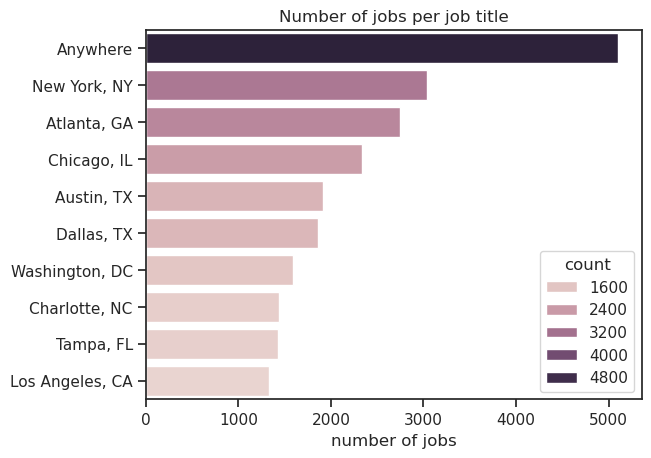

In [49]:
sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x='count', y='job_location', hue='count' )

plt.title('Number of jobs per job title')
plt.xlabel('number of jobs')
plt.ylabel('')
plt.show()

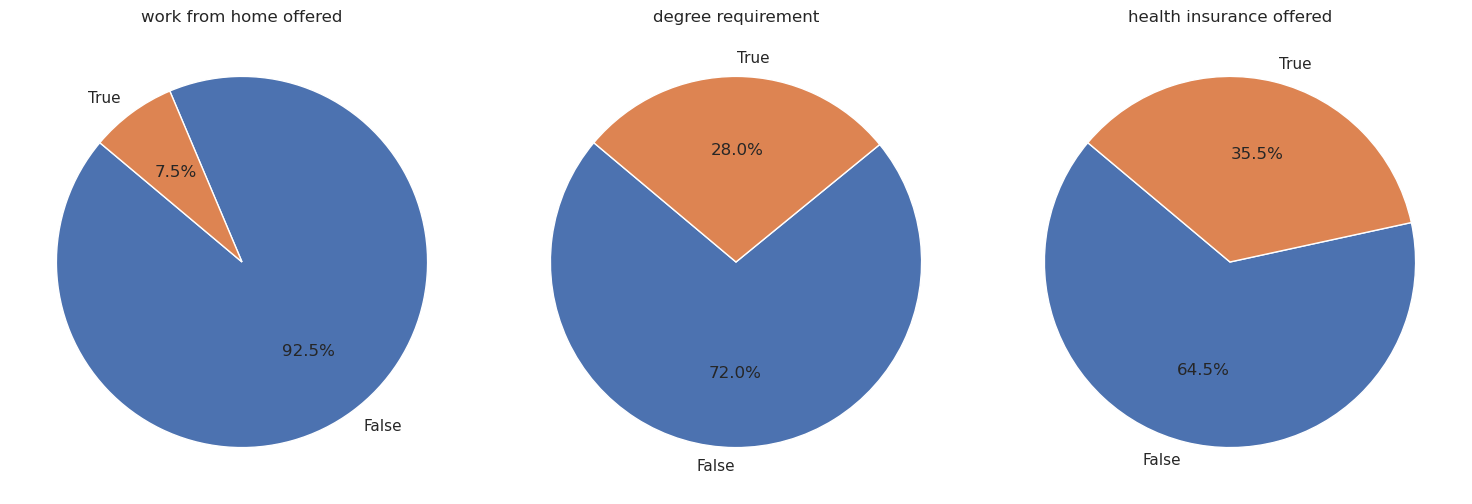

In [50]:
dict_column = {
    'job_work_from_home' :'work from home offered',
    'job_no_degree_mention' : 'degree requirement',
    'job_health_insurance' : 'health insurance offered'
}
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the dictionary items and create pie charts
for i, (column, title) in enumerate(dict_column.items()):
    # Assuming df_DA_US is your original DataFrame and column is the current column of interest
    counts = df_DA_US[column].value_counts()
    
    # Create the pie chart in the corresponding subplot
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(title)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

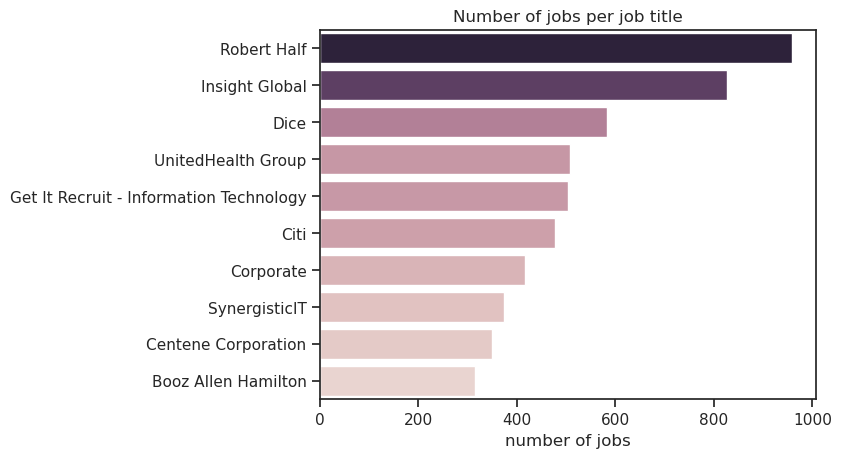

In [54]:
df_plot1 = df_DA_US['company_name'].value_counts().head(10).to_frame().reset_index()
df_plot1.columns = ['company_name', 'count']
df_plot1.head(10)


sns.set_theme(style='ticks')
sns.barplot(data = df_plot1, x='count', y='company_name', hue='count', legend=False)

plt.title('Number of jobs per job title')
plt.xlabel('number of jobs')
plt.ylabel('')
plt.show()

